[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yashl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yashl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\yashl\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yashl\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yashl\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comfortable,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,5,1,6,General,Tops,Blouses


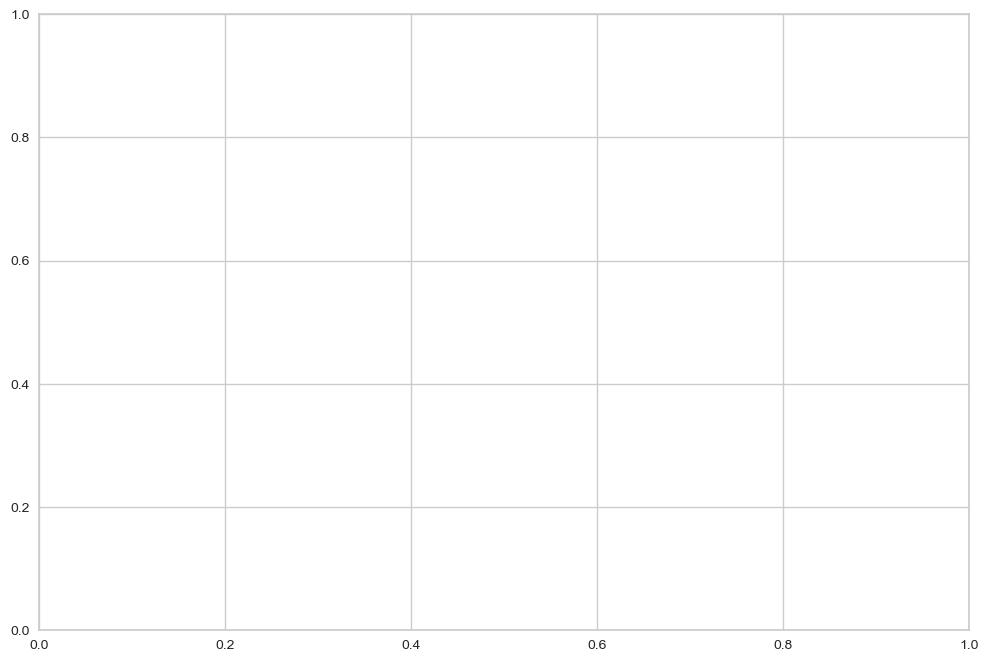

In [90]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
import plotly.express as px
import plotly.graph_objects as go
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud 
from sklearn.metrics import plot_confusion_matrix, classification_report, f1_score, recall_score
from sklearn.metrics import precision_recall_curve, average_precision_score

from yellowbrick.classifier import PrecisionRecallCurve

import nltk
nltk.download("punkt")
nltk.download('stopwords')
nltk.download('wordnet')

# Importing plotly and cufflinks in offline mode

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
%matplotlib inline
fig, ax = plt.subplots()
# fig.set_size_inches(10, 6)
plt.rcParams["figure.figsize"] = (12, 8)  # the size of A4 paper use (11.7, 8.27)
pd.set_option('max_colwidth', 200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# !pip install termcolor
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

import ipywidgets
from ipywidgets import interact

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

df = pd.read_csv(r'C:\Users\yashl\OneDrive\Documents\womendress\Womens Clothing E-Commerce Reviews.csv')
df.head()

In [3]:
# Remove columns
del df['Unnamed: 0']

# How many reviews do we have?
print('There are', df.shape[0], 'reviews in this dataset')

# Do we have duplicates?
print('Number of Duplicates:', len(df[df.duplicated()]))

# Do we have missing values?
print('Number of Missing Values:', df.isnull().sum().sum())

There are 23486 reviews in this dataset
Number of Duplicates: 21
Number of Missing Values: 4697


In [4]:
print('Number of Missing Values per column:')
df.isnull().sum().sort_values(ascending=False)

Number of Missing Values per column:


Title                      3810
Review Text                 845
Division Name                14
Department Name              14
Class Name                   14
Clothing ID                   0
Age                           0
Rating                        0
Recommended IND               0
Positive Feedback Count       0
dtype: int64

In [5]:
# Remove rows with nulls in specific columns
df = df.dropna(subset = ['Review Text', 'Division Name', 'Department Name', 'Class Name'])

In [6]:
# Necessary libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics

import re
import string

from tensorflow import keras
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.layers import SimpleRNN, LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [8]:
# Let's just work with the reviews and recommendations
data = df[['Review Text', 'Recommended IND']]

In [9]:
# Cleaning the text
def clean_text(text):
    '''Make text lowercase, remove text in square brackets, 
    remove links, remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [10]:
data['Review Text'] = data['Review Text'].apply(lambda x:clean_text(x))

In [32]:
# Setting up the evaluation metrics
def roc_auc(predictions,target):
    
    fpr, tpr, thresholds = metrics.roc_curve(target, predictions)
    roc_auc = metrics.auc(fpr, tpr)
    return roc_auc
df1 = data

In [33]:
# Split target & features
# recommend IND : 1 == would recommend, 0 == not recommend
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND']

# Spliting train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    stratify=y,
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    shuffle=True)

In [34]:
# Keras takenization text data prep

num_words = None   # the most X frequent words is returned

# Tokenize data
tokenizer = Tokenizer(num_words=num_words)
tokenizer.fit_on_texts(X_train['Review Text'].tolist() + X_test['Review Text'].tolist())   # introduce text in list

# Get data word index
word_index = tokenizer.word_index

# Encode training/test data sentences into sequences
X_train_seq = tokenizer.texts_to_sequences(X_train['Review Text'].tolist())
X_test_seq = tokenizer.texts_to_sequences(X_test['Review Text'].tolist())
df_test_seq = tokenizer.texts_to_sequences(df1['Review Text'].tolist())

# Get max training sequence length
max_len = max([len(x) for x in X_train_seq])

# Pad the training/test sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)
df_pad = pad_sequences(df_test_seq, maxlen=max_len)

# Output some results 
print("\nPadded training shape:", X_train_pad.shape)
print("\nPadded test shape:", X_test_pad.shape)


Padded training shape: (18102, 112)

Padded test shape: (4526, 112)


In [35]:
model = Sequential()
model.add(Embedding(len(word_index) + 1,
                    50,     # embeds it in a 50-dimensional vector
                    input_length=max_len))

model.add(LSTM(100, dropout=0.3, recurrent_dropout=0.3))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])
    
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 112, 50)           1022500   
                                                                 
 lstm_2 (LSTM)               (None, 100)               60400     
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 1,083,001
Trainable params: 1,083,001
Non-trainable params: 0
_________________________________________________________________


In [36]:
batch_size = 512

model.fit(X_train_pad, y_train, epochs=6, batch_size=batch_size)

Epoch 1/6
36/36 [==============================] - 46s 1s/step - loss: 0.5152 - accuracy: 0.8130
Epoch 2/6
36/36 [==============================] - 44s 1s/step - loss: 0.3863 - accuracy: 0.8273
Epoch 3/6
36/36 [==============================] - 35s 984ms/step - loss: 0.2648 - accuracy: 0.8874
Epoch 4/6
36/36 [==============================] - 34s 951ms/step - loss: 0.2077 - accuracy: 0.9129
Epoch 5/6
36/36 [==============================] - 35s 965ms/step - loss: 0.1750 - accuracy: 0.9282
Epoch 6/6
36/36 [==============================] - 35s 969ms/step - loss: 0.1590 - accuracy: 0.9377


In [37]:
scores = model.predict(X_test_pad)
print("AUC: %.2f%%" % (roc_auc(scores,y_test)))

142/142 [==============================] - 3s 17ms/step
AUC: 0.92%


In [55]:
#Import sklearn classes 
from sklearn.model_selection import train_test_split,RepeatedKFold, cross_val_score,KFold, RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# sklearn utility to compare algorithms
from sklearn import model_selection

#Visualisation Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns 

import warnings  
warnings.filterwarnings('ignore')


In [57]:
# COUNT VECTORIZATION

In [62]:
from sklearn.feature_extraction.text import CountVectorizer
print(X_train)

                                             Review Text
7387   love this and wish it came in more colors the ...
8791   i am  and  lbs and bought a size s it fits but...
12191  i ordered  different styles of jogger pants an...
4023   i had been eyeing the maroon one and i snatche...
7897   i ordered the size xl and it fits me as it doe...
...                                                  ...
21381  i just received this blouse and love itmore be...
5982   this top is beautiful and fits true to size   ...
15395  great dress nicely structured but the fabric i...
12264  i generally wear a  jeans fit perfectly skinny...
13178  i just purchased these jeans online in my regu...

[18102 rows x 1 columns]


In [65]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train['Review Text'])
X_test_count = vectorizer.transform(X_test['Review Text'])

In [66]:
print(X_train_count)

  (0, 8253)	1
  (0, 14682)	1
  (0, 434)	5
  (0, 16399)	1
  (0, 7230)	3
  (0, 2076)	1
  (0, 6940)	3
  (0, 8993)	1
  (0, 2729)	1
  (0, 14546)	3
  (0, 4905)	1
  (0, 3432)	1
  (0, 616)	1
  (0, 13281)	2
  (0, 2797)	1
  (0, 1652)	1
  (0, 9139)	1
  (0, 15670)	1
  (0, 12898)	1
  (0, 15987)	1
  (0, 8077)	1
  (0, 12070)	1
  (0, 14895)	3
  (0, 12340)	1
  (0, 14537)	1
  :	:
  (18101, 14555)	1
  (18101, 12039)	1
  (18101, 10387)	1
  (18101, 7369)	3
  (18101, 5100)	1
  (18101, 12939)	1
  (18101, 5603)	1
  (18101, 16074)	1
  (18101, 11538)	1
  (18101, 346)	1
  (18101, 5918)	1
  (18101, 617)	1
  (18101, 9319)	1
  (18101, 12490)	1
  (18101, 9820)	1
  (18101, 14545)	1
  (18101, 10878)	1
  (18101, 14807)	1
  (18101, 866)	1
  (18101, 9316)	1
  (18101, 14005)	1
  (18101, 4573)	1
  (18101, 14629)	1
  (18101, 10360)	1
  (18101, 4781)	1


In [67]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [68]:
vectorizer.get_feature_names()

['aa',
 'aaaaannnnnnd',
 'aaaahs',
 'aaahed',
 'aame',
 'ab',
 'abbey',
 'abby',
 'abdomen',
 'abercrombie',
 'abhor',
 'ability',
 'abject',
 'able',
 'abnormally',
 'abo',
 'abolutely',
 'abou',
 'about',
 'above',
 'abovetheknee',
 'abroad',
 'abs',
 'absence',
 'abso',
 'absolute',
 'absolutely',
 'absolutley',
 'absolutly',
 'absoluty',
 'absorbent',
 'abstract',
 'absurd',
 'absurdly',
 'abt',
 'abundance',
 'abundant',
 'abused',
 'abut',
 'ac',
 'acacia',
 'accent',
 'accented',
 'accenting',
 'accents',
 'accentuate',
 'accentuatea',
 'accentuated',
 'accentuates',
 'accentuating',
 'accept',
 'acceptabl',
 'acceptable',
 'acceptably',
 'accepted',
 'accepts',
 'access',
 'accessories',
 'accessoriesanticipating',
 'accessoriesi',
 'accessorize',
 'accessorized',
 'accessorizes',
 'accessorizing',
 'accessory',
 'accident',
 'accidental',
 'accidentally',
 'acco',
 'accomadate',
 'accommodate',
 'accommodated',
 'accommodates',
 'accommodating',
 'accomodate',
 'accompanies',


In [69]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

,aa,aaaaannnnnnd,aaaahs,aaahed,aame,ab,abbey,abby,abdomen,abercrombie,...,zippers,zippie,zipping,zips,zombie,zone,zoolanders,zoom,zooming,ã¼ber
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18097,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18098,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18099,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [99]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train['Review Text'])
X_test_tf_idf = tf_idf_vectorizer.transform(X_test['Review Text'])
df_test_tf_idf = tf_idf_vectorizer.transform(df1['Review Text'])

In [102]:
X_train_tf_idf.toarray()
df_test_tf_idf.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [76]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())


,aa,aaaaannnnnnd,aaaahs,aaahed,aame,ab,abbey,abby,abdomen,abercrombie,...,zippers,zippie,zipping,zips,zombie,zone,zoolanders,zoom,zooming,ã¼ber
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18097,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18098,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [77]:
from sklearn.metrics import confusion_matrix,classification_report, f1_score, recall_score, accuracy_score, precision_score

In [78]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print("Test_Set")
    print(classification_report(y_test, y_pred))
    print("Train_Set")
    print(classification_report(y_train, y_pred_train))
    fig, ax = plt.subplots(figsize=(8, 8))
    
    plot_confusion_matrix(model, X_test, y_test, ax=ax)

In [79]:
#logestic Regression
log = LogisticRegression(C=0.1, max_iter=1000, random_state=101, class_weight="balanced")

log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

LOG MODEL
Test_Set
              precision    recall  f1-score   support

           0       0.54      0.87      0.67       820
           1       0.97      0.84      0.90      3706

    accuracy                           0.84      4526
   macro avg       0.75      0.85      0.78      4526
weighted avg       0.89      0.84      0.85      4526

Train_Set
              precision    recall  f1-score   support

           0       0.58      0.89      0.70      3281
           1       0.97      0.85      0.91     14821

    accuracy                           0.86     18102
   macro avg       0.77      0.87      0.80     18102
weighted avg       0.90      0.86      0.87     18102



NameError: name 'plot_confusion_matrix' is not defined

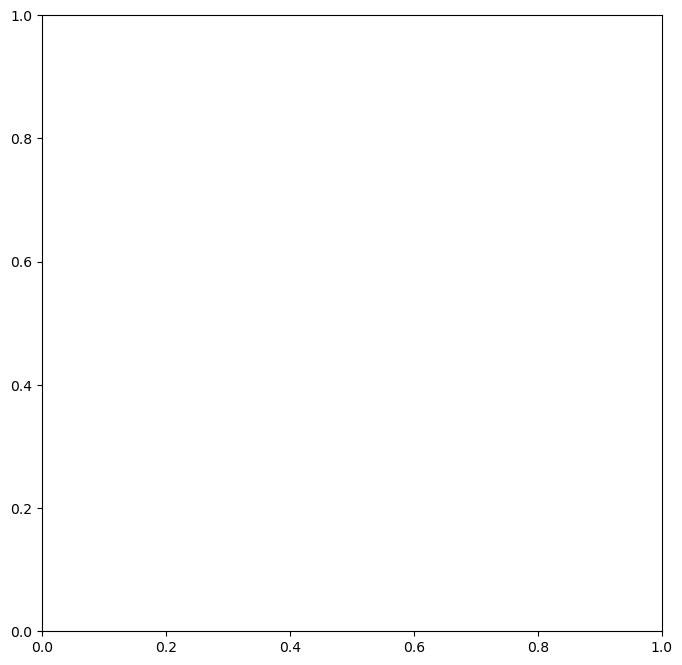

In [80]:
print("LOG MODEL")

eval(log, X_train_tf_idf, X_test_tf_idf)

In [93]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = LogisticRegression(C =0.6, max_iter=1000, class_weight= "balanced", random_state=101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_count_rec = scores
    elif i == "f1-1":
        log_count_f1 = scores
    print(f" {i:20} score for count : {scores}\n")

 accuracy             score for count : 0.8761465690028098

 precision-0          score for count : 0.6263786697768821

 recall-0             score for count : 0.7848218919119283

 f1-0                 score for count : 0.6964355181887051

 precision-1          score for count : 0.9496221131768099

 recall-1             score for count : 0.8963635097911281

 f1-1                 score for count : 0.922191001980688



In [94]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
nb = MultinomialNB()
nb.fit(X_train_tf_idf, y_train)

MultinomialNB()

NB MODEL
Test_Set
              precision    recall  f1-score   support

           0       1.00      0.00      0.01       820
           1       0.82      1.00      0.90      3706

    accuracy                           0.82      4526
   macro avg       0.91      0.50      0.45      4526
weighted avg       0.85      0.82      0.74      4526

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.03      0.05      3281
           1       0.82      1.00      0.90     14821

    accuracy                           0.82     18102
   macro avg       0.91      0.51      0.48     18102
weighted avg       0.85      0.82      0.75     18102



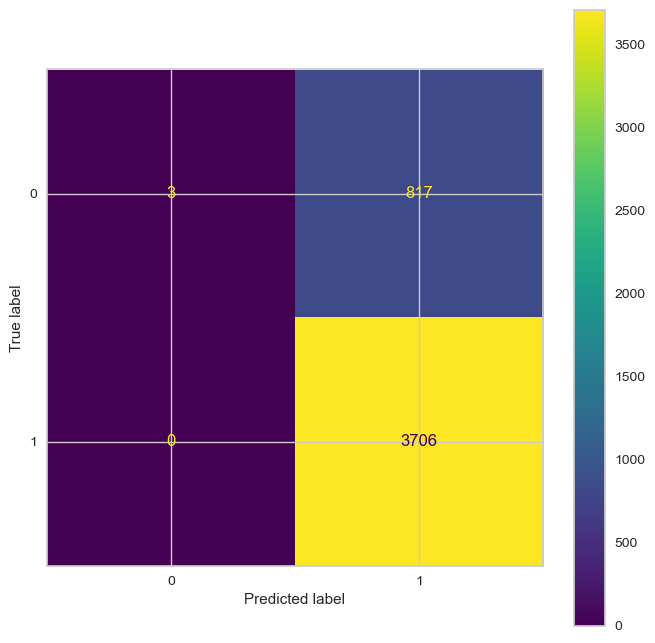

In [95]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

In [96]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nb_tfidf_rec = scores
    elif i == "f1-1":
        nb_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

 accuracy             score for tfidf : 0.8683022108599687

 precision-0          score for tfidf : 0.6469066182564343

 recall-0             score for tfidf : 0.6046917858996219

 f1-0                 score for tfidf : 0.6246485802894919

 precision-1          score for tfidf : 0.9137396731902699

 recall-1             score for tfidf : 0.9266583583810399

 f1-1                 score for tfidf : 0.9201277595505392



In [104]:
# log and nb are our 2 classifiers 
#lets try combining it

preds1 = log.predict(X_test_tf_idf)
preds2 = nb.predict(X_test_tf_idf)


test_preds1 = log.predict(df_test_tf_idf)
test_preds2 = nb.predict(df_test_tf_idf)

In [105]:
#making a new dataset for training our final model by stacking the predictions on the validation data
train_stack = np.column_stack((preds1,preds2,preds3))

#making the final test set for our final model by stacking the predictions on the test data
test_stack = np.column_stack((test_preds1,test_preds2,test_preds3))

In [107]:
final_model = RandomForestClassifier()

#training the final model on the stacked predictions
final_model.fit(train_stack,y_test)

RandomForestClassifier()

In [111]:
final_predictions = final_model.predict(test_stack)

In [115]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier()
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        final_model_tfidf_rec = scores
    elif i == "f1-1":
        final_model_tfidf_f1 = scores
    print(f" {i:20} score for tfidf : {scores}\n")

KeyboardInterrupt: 

In [118]:


# Define estimators
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import matthews_corrcoef

estimator_list = [
    ('log',log),
    ('nb',nb) ]

# Build stack model
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)

# Train stacked model
stack_model.fit(X_train_tf_idf, y_train)

# Make predictions
y_train_pred = stack_model.predict(X_train_tf_idf)
y_test_pred = stack_model.predict(X_test_tf_idf)

# Training set model performance
stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) # Calculate Accuracy
stack_model_train_mcc = matthews_corrcoef(y_train, y_train_pred) # Calculate MCC
stack_model_train_f1 = f1_score(y_train, y_train_pred, average='weighted') # Calculate F1-score

# Test set model performance
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) # Calculate Accuracy
stack_model_test_mcc = matthews_corrcoef(y_test, y_test_pred) # Calculate MCC
stack_model_test_f1 = f1_score(y_test, y_test_pred, average='weighted') # Calculate F1-score

print('Model performance for Training set')
print('- Accuracy: %s' % stack_model_train_accuracy)
print('- MCC: %s' % stack_model_train_mcc)
print('- F1 score: %s' % stack_model_train_f1)
print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % stack_model_test_accuracy)
print('- MCC: %s' % stack_model_test_mcc)
print('- F1 score: %s' % stack_model_test_f1)

Model performance for Training set
- Accuracy: 0.9065296652303613
- MCC: 0.6787334777769296
- F1 score: 0.9055174837092336
----------------------------------
Model performance for Test set
- Accuracy: 0.8875386654882899
- MCC: 0.6002976703972988
- F1 score: 0.8838973216096795
